Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.
- 결측치를 처리합니다.
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다.

Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용됩니다. 이 데이터셋의 컬럼들은 다음과 같습니다:

- age: 나이 (숫자)
개인의 나이를 나타냅니다.
- workclass: 직업 유형 (범주형)
개인의 직업 유형을 나타냅니다. 예를 들어, 'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미합니다.
- education: 교육 수준 (범주형)
개인의 교육 수준을 나타냅니다. 예를 들어, 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 나타낸 것입니다. 예를 들어, 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냅니다.
- marital-status: 결혼 상태 (범주형)
개인의 결혼 상태를 나타냅니다. 예를 들어, 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업을 나타냅니다. 예를 들어, 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계를 나타냅니다. 예를 들어, 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종을 나타냅니다. 예를 들어, 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별을 나타냅니다. 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득을 나타냅니다. 자본 자산의 매매에서 발생하는 이익입니다.
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실을 나타냅니다. 자본 자산의 매매에서 발생하는 손실입니다.
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간을 나타냅니다.
- native-country: 출생 국가 (범주형)
개인의 출생 국가를 나타냅니다. 예를 들어, 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준을 나타냅니다. ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냅니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data_org = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

QR 방법을 사용한 이상치 제거 가이드

IQR 계산
- IQR(Interquartile Range)은 데이터의 중앙 50%를 나타내며, 데이터의 변동성을 측정하는 데 사용됩니다. IQR은 3사분위수(Q3)와 1사분위수(Q1)의 차이로 계산됩니다.
  - Q1: 데이터의 25번째 백분위수(1사분위수)
  - Q3: 데이터의 75번째 백분위수(3사분위수)
  - IQR: Q3 - Q1

이상치 경계 계산
- 일반적으로 IQR의 1.5배를 사용하여 이상치 경계를 설정합니다.
  - Lower Bound: Q1 - 1.5 * IQR
  - Upper Bound: Q3 + 1.5 * IQR
- 이 경계를 벗어나는 데이터 포인트는 이상치로 간주됩니다.

이상치를 제거는 데이터의 분포를 왜곡하는 극단적인 값을 제거하여 데이터 분석 및 모델 성능을 향상시키는 데 도움이 됩니다. 도메인 지식과 데이터의 특성을 고려해서 이상치 제거를 진행합니다.

In [ ]:
data_org.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
data = data_org.copy()
# 결측치 제거
data = data.dropna()

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# teach
columns = ['capital-gain', 'capital-loss']
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1
outliers = (data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))

df = data.drop(outliers.index)

In [ ]:
# 파생변수
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

One-Hot Encoding
- 비순서형 범주형 변수: 대부분의 범주형 변수는 순서가 없습니다. 예를 들어, workclass, occupation, race, sex 등의 변수는 순서가 없습니다. 이 경우, 각 범주를 고유한 이진 벡터로 변환하는 것이 적합합니다.
- 모델의 가정: Logistic Regression과 같은 선형 모델은 입력 변수들이 서로 독립적이라고 가정합니다. One-hot encoding은 이러한 가정을 유지하는 데 도움이 됩니다.
- 다중공선성 방지: One-hot encoding은 다중공선성 문제를 피하기 위해 첫 번째 범주를 제거할 수 있습니다. 이 방법은 drop_first=True 옵션을 사용하여 구현됩니다.

Label Encoding
- 순서형 범주형 변수: Label encoding은 범주에 순서가 있는 경우에 적합합니다. 예를 들어, 교육 수준(예: 초등학교 < 중학교 < 고등학교 < 대학교)은 순서가 있는 범주형 변수입니다.
- 트리 기반 모델: 결정 트리, 랜덤 포레스트, XGBoost와 같은 트리 기반 모델은 label encoding된 변수를 더 잘 처리할 수 있습니다. 이는 트리 기반 모델이 변수 간의 순서를 처리할 수 있기 때문입니다.

Adult Income 데이터셋의 경우, 대부분의 범주형 변수는 순서가 없으므로 one-hot encoding을 사용하는 것이 적절

In [ ]:
# 범주형 변수 인코딩
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
data = pd.get_dummies(data, columns = categorical_features, drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education-num                              30162 non-null  int64
 3   capital-gain                               30162 non-null  int64
 4   capital-loss                               30162 non-null  int64
 5   hours-per-week                             30162 non-null  int64
 6   capital_diff                               30162 non-null  int64
 7   workclass_Local-gov                        30162 non-null  bool 
 8   workclass_Private                          30162 non-null  bool 
 9   workclass_Self-emp-inc                     30162 non-null  bool 
 10  workclass_Self-emp-not-inc                 30162 no

In [ ]:
# 변수 선택 및 데이터 분리
X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋 학습용 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[4199  304]
 [ 582  948]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      4503
        True       0.76      0.62      0.68      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data = data_org.copy()
# 데이터 결측치 처리
data = data.dropna()

# 이상치 처리 (제외)
columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

outliers = (data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))
df = data[~outliers.any(axis=1)]

In [ ]:
# 파생변수 작성


# 범주형 변수 인코딩
married_mapping = {'Married-civ-spouse':'married', 'Married-spouse-absent':'married', 'Married-AF-spouse':'married',
                   'Never-married':'single', 'Divorced':'single', 'Separated':'single', 'Widowed':'single'}

# 직업군 범주화 정의
def categorize_occupation(occupation):
    if occupation in ['Exec-managerial', 'Adm-clerical', 'Tech-support', 'Sales']:
        return 'Office'
    elif occupation in ['Other-service', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']:
        return 'Service'
    elif occupation in ['Machine-op-inspct', 'Craft-repair', 'Transport-moving', 'Farming-fishing']:
        return 'Technical'
    elif occupation == 'Prof-specialty':
        return 'Professional'
    else:
        return 'Other'

def categorize_family_status(relationship):
    if relationship in ['Husband', 'Wife', 'Own-child', 'Other-relative']:
        return 'Family'
    else:
        return 'Non-Family'

# 범주화 적용
df['marital-status'] = df['marital-status'].map(married_mapping)
df['occupation-category'] = df['occupation'].apply(categorize_occupation)
df['family-status'] = df['relationship'].apply(categorize_family_status)
df['race'] = df['race'].map({'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4})
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

<ipython-input-8-614e8916a255>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status'] = df['marital-status'].map(married_mapping)
<ipython-input-8-614e8916a255>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation-category'] = df['occupation'].apply(categorize_occupation)
<ipython-input-8-614e8916a255>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
# 수치형 변수 범주화
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
# 나이대를 범주화하여 새로운 열에 추가
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

bins = [0, 40, 50, float('inf')]
labels = ['소', '중', '과']
# 주당 근무 시간을 범주화하여 새로운 열에 추가
df['work_hours_group'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels, right=True)

bins = [0, 11, 15, 20]  # 예: 0-5, 6-10, 11-15, 16-20
labels = ['저학력', '보통', '고학력']

# 범주화
df['education_level'] = pd.cut(df['education-num'], bins=bins, labels=labels, right=True)

<ipython-input-9-850051cae3a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
<ipython-input-9-850051cae3a8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_hours_group'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels, right=True)
<ipython-input-9-850051cae3a8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
# 독립변수 X와 종속변수 y 설정
X = df[['education_level', 'marital-status', 'occupation-category', 'family-status', 'race', 'sex', 'age_group', 'work_hours_group']]
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 데이터셋 학습용과 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 범주형 및 수치형 변수 분리
categorical_features = ['education_level', 'marital-status', 'occupation-category', 'family-status', 'age_group', 'work_hours_group']
numeric_features = ['race', 'sex']

# 범주형 변수 인코딩
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
X_train_cat = categorical_transformer.fit_transform(X_train[categorical_features])
X_test_cat = categorical_transformer.transform(X_test[categorical_features])

# 수치형 변수 스케일링
numeric_transformer = StandardScaler()
X_train_num = numeric_transformer.fit_transform(X_train[numeric_features])
X_test_num = numeric_transformer.transform(X_test[numeric_features])

# 인코딩된 범주형 변수와 스케일링된 수치형 변수를 결합
X_train_preprocessed = hstack([X_train_cat, X_train_num])
X_test_preprocessed = hstack([X_test_cat, X_test_num])

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=1000)

# 파라미터 그리드 설정
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5)

# 학습
grid_search.fit(X_train_preprocessed, y_train)

# 예측
print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# 모델 평가
y_pred = grid_search.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Best Parameters:{'C': 0.01}
Best Score: 0.84
Accuracy: 0.84


Task1_0723. 'Breast Cancer Wisconsin (Diagnostic) Data Set'을 사용하여 이진 분류 문제를 해결하고, 평가 지표(정확도, 정밀도, 재현율, F1 스코어, ROC AUC)를 계산하세요.

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [1]:
# 데이터 로드
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [50]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [52]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [54]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


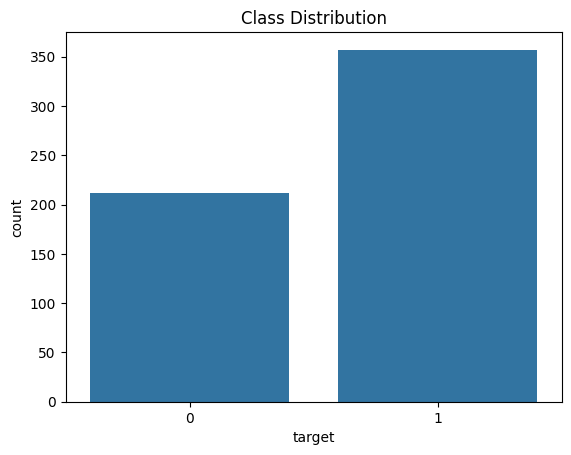

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
df['target'] = data.target

sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 예측 확률
pred_proba = model.predict_proba(X_test)[:, 1] # 이진분류에선 임계치(0.5)값이 디폴트로 적용됨.

# 평가지표
get_clf_eval(y_test, pred, pred_proba)

정확도: 0.9561, 정밀도: 0.9459, 재현율: 0.9859, F1: 0.9655, ROC-AUC: 0.9977


Task2_0723.
가상의 데이터셋을 생성하고, 이를 사용하여 다중 클래스 분류 모델을 훈련시킨 후 평가 지표를 계산하세요. 평가 지표는 정확도, 정밀도, 재현율, F1 스코어, ROC AUC입니다.

- n_samples=1500: 데이터셋에 포함될 샘플의 수를 1500개로 지정합니다.
- n_features=20: 각 샘플이 가질 특성(feature)의 수를 20개로 지정합니다.
- n_classes=5: 타겟 라벨의 클래스 수를 5개로 지정합니다.
- n_informative=15: 20개의 특성 중 15개는 타겟 라벨과 관련된 유용한 정보를 포함하도록 지정합니다. 나머지 5개의 특성은 유용하지 않거나 무작위로 생성된 특성입니다.
- random_state=42: 재현성을 위해 난수 생성 seed를 설정합니다.

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')

    # ROC-AUC 계산 (다중 클래스에 대해 이진화)
    y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4])
    roc_auc = roc_auc_score(y_test_binarized, pred_proba, multi_class='ovr')

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 데이터 생성 (5개의 클래스)
X, y = make_classification(n_samples=1500, n_features=20, n_classes=5, n_informative=15, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 훈련
model = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 예측 확률
pred_proba = model.predict_proba(X_test)

# 평가지표
get_clf_eval(y_test, pred, pred_proba)

정확도: 0.5911, 정밀도: 0.6014, 재현율: 0.5911, F1: 0.5903, ROC-AUC: 0.8614


In [59]:
print("데이터 X의 형태: ", X.shape)  # (샘플 수, 특성 수)
print("타겟 y의 형태: ", y.shape)  # (샘플 수, )

# 클래스 분포 확인
unique_classes, class_counts = np.unique(y, return_counts=True)
print("클래스:", unique_classes)
print("클래스별 샘플 수:", class_counts)
print("총 클래스 개수:", len(unique_classes))

데이터 X의 형태:  (1500, 20)
타겟 y의 형태:  (1500,)
클래스: [0 1 2 3 4]
클래스별 샘플 수: [302 304 299 299 296]
총 클래스 개수: 5


Task3_0723. 주어진 코드를 수정하여 모델의 성능을 개선하시오.

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# 2. 결측치 처리
# 수치형 변수의 결측치를 중앙값으로 대체
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
imputer_numeric = SimpleImputer(strategy='median')
data[numeric_features] = imputer_numeric.fit_transform(data[numeric_features])

# 범주형 변수의 결측치를 최빈값으로 대체
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
categorical_features.remove('income')
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

# 3. 이상치 제거 (여기서는 'capital-gain'과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

for col in numeric_features:
    data = replace_outliers_with_median(data, col)

# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

# 5. 범주형 변수 인코딩
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# 원래 데이터프레임에서 범주형 열을 제거하고 인코딩된 데이터프레임을 병합
data = data.drop(columns=categorical_features)
data = pd.concat([data, encoded_categorical_df], axis=1)

# 6. 변수 선택 및 데이터 분리
# 'income' 변수를 0과 1로 변환
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
X = data.drop('income', axis=1)
y = data['income']

# 7. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 9. Logistic Regression 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.83
Confusion Matrix:
[[4556  389]
 [ 689  879]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4945
           1       0.69      0.56      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.83      0.83      6513



In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. 예측 확률 추출
pred_proba = model.predict_proba(X_test)[:, 1]

# 2. ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# 3. AUC 계산
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.2f}')

# 4. 최적 임계치 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.2f}')

# 5. 최적 임계치로 예측 수행
y_pred_optimal = (pred_proba >= optimal_threshold).astype(int)

# 6. 평가
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
class_report_optimal = classification_report(y_test, y_pred_optimal)

print(f'Optimal Threshold Accuracy: {accuracy_optimal:.2f}')
print('Optimal Threshold Confusion Matrix:')
print(conf_matrix_optimal)
print('Optimal Threshold Classification Report:')
print(class_report_optimal)

ROC AUC: 0.89
Optimal Threshold: 0.26
Optimal Threshold Accuracy: 0.79
Optimal Threshold Confusion Matrix:
[[3829 1116]
 [ 241 1327]]
Optimal Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4945
           1       0.54      0.85      0.66      1568

    accuracy                           0.79      6513
   macro avg       0.74      0.81      0.76      6513
weighted avg       0.85      0.79      0.80      6513



In [88]:
pred_proba = model.predict_proba(X_test)

def get_clf_eval(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    num_classes = pred_proba.shape[1]
    for custom_threshold in thresholds:
        # 각 클래스에 대해 임계치를 적용하여 이진화
        y_pred_custom = np.zeros_like(y_test)
        for i in range(num_classes):
            y_pred_custom[pred_proba[:, i] >= custom_threshold] = i
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, y_pred_custom, pred_proba)
        print()

# 다양한 임계치 설정
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

# 임계치별 평가
get_eval_by_threshold(y_test, pred_proba, thresholds)

임계값: 0.4
정확도: 0.8316, 정밀도: 0.6416, 재현율: 0.6805, F1: 0.6605, AUC: 0.7800

임계값: 0.45
정확도: 0.8337, 정밀도: 0.6662, 재현율: 0.6199, F1: 0.6422, AUC: 0.7607

임계값: 0.5
정확도: 0.8345, 정밀도: 0.6932, 재현율: 0.5606, F1: 0.6199, AUC: 0.7410

임계값: 0.55
정확도: 0.8317, 정밀도: 0.7165, 재현율: 0.4981, F1: 0.5877, AUC: 0.7178

임계값: 0.6
정확도: 0.8306, 정밀도: 0.7524, 재현율: 0.4420, F1: 0.5569, AUC: 0.6979



기본 모델은 전반적으로 높은 ROC AUC를 보여주며, 정확도와 F1 점수가 좋습니다. 이는 기본 임계값이 좋은 균형을 유지하고 있음을 시사합니다.

임계값 0.4에서는 F1 점수가 가장 높습니다. 이는 재현율과 정밀도 간의 균형이 잘 맞춰져 있다는 것을 의미합니다.

임계값 0.6에서는 정밀도가 가장 높지만, 재현율이 낮아지므로, 긍정적인 예측의 신뢰도가 높지만, 실제 긍정적인 사례를 놓치는 비율이 증가합니다.

임계값 0.26은 재현율이 가장 높지만, 정밀도가 낮습니다. 이는 긍정적인 예측이 많지만, 정확하지 않을 수 있음을 의미합니다.

따라서, 임계값 0.4가 F1 점수를 최적화하며, 기본 모델이 가장 높은 ROC AUC를 제공하므로 전체적으로 좋은 성능을 보입니다. 문제의 요구사항에 따라 정밀도, 재현율, F1 점수 또는 AUC 중 어느 하나를 우선시하는지에 따라 최적 임계값을 결정할 수 있습니다.